In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix, precision_recall_fscore_support, classification_report

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

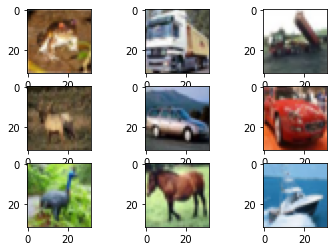

In [3]:
fig,axis=plt.subplots(3,3)
cnt=0
for i in range(3):
    for j in range(3):
        axis[i,j].imshow(x_train[cnt])
        cnt+=1

In [4]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(1024,activation=tf.nn.relu),
    Dense(256, activation=tf.nn.relu),
    Dense(256, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(128, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(64, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax),
])


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)              

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, batch_size=300,verbose=1)

Epoch 1/50
167/167 [==============================] - 25s 63ms/step - loss: 2.1617 - accuracy: 0.1726 - val_loss: 2.0782 - val_accuracy: 0.2127
Epoch 2/50
167/167 [==============================] - 9s 56ms/step - loss: 2.0695 - accuracy: 0.2117 - val_loss: 2.0522 - val_accuracy: 0.2224
Epoch 3/50
167/167 [==============================] - 9s 54ms/step - loss: 1.9900 - accuracy: 0.2533 - val_loss: 1.9687 - val_accuracy: 0.2691
Epoch 4/50
167/167 [==============================] - 9s 56ms/step - loss: 1.9013 - accuracy: 0.2957 - val_loss: 1.8897 - val_accuracy: 0.3137
Epoch 5/50
167/167 [==============================] - 9s 56ms/step - loss: 1.8678 - accuracy: 0.3134 - val_loss: 1.8454 - val_accuracy: 0.3211
Epoch 6/50
167/167 [==============================] - 9s 55ms/step - loss: 1.8519 - accuracy: 0.3190 - val_loss: 1.8811 - val_accuracy: 0.3066
Epoch 7/50
167/167 [==============================] - 9s 55ms/step - loss: 1.8175 - accuracy: 0.3340 - val_loss: 1.7926 - val_accuracy: 0.346

In [23]:
loss1,tr_accuracy=model.evaluate(x_train,y_train)
print('Train accuracy = ',tr_accuracy)
loss2,te_accuracy=model.evaluate(x_test,y_test)
print('Test accuracy = ',te_accuracy)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.4230 - accuracy: 0.4858
Train accuracy =  0.4858199954032898
313/313 [==============================] - 1s 4ms/step - loss: 1.6827 - accuracy: 0.4157
Test accuracy =  0.4156999886035919


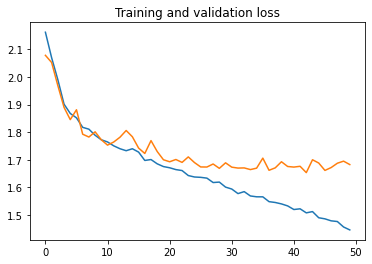

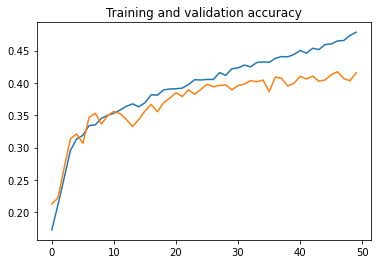

In [24]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.show()
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.show()

In [25]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 4ms/step


In [26]:
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

In [27]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Support: {support}')

Precision: 0.4168918027657548
Recall: 0.4157
F1 Score: 0.41209284506977517
Support: None


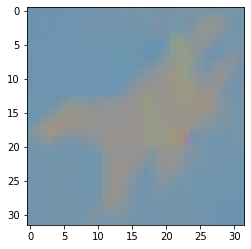

In [28]:
plt.imshow(x_test[10])
plt.show()

In [29]:
cm=confusion_matrix(y_true,y_pred)
print(cm)

[[415 112  35  59  33  18  46  47 126 109]
 [ 61 583  22  53  11  28  16  42  39 145]
 [ 68  63 263  88 140  67 144 114  20  33]
 [ 48  54  57 308  59 167 174  65  22  46]
 [ 38  23 115  67 373  45 129 149  26  35]
 [ 31  55  62 230  73 274 124  86  23  42]
 [  9  18  69 109 142  49 530  48   6  20]
 [ 49  33  50  79  70  52  44 536  13  74]
 [126 101  19  68  39  28  11  20 489  99]
 [ 76 254  19  60  26  23  39  77  40 386]]


In [30]:
report=classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.45      0.41      0.43      1000
           1       0.45      0.58      0.51      1000
           2       0.37      0.26      0.31      1000
           3       0.27      0.31      0.29      1000
           4       0.39      0.37      0.38      1000
           5       0.36      0.27      0.31      1000
           6       0.42      0.53      0.47      1000
           7       0.45      0.54      0.49      1000
           8       0.61      0.49      0.54      1000
           9       0.39      0.39      0.39      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.41     10000
weighted avg       0.42      0.42      0.41     10000



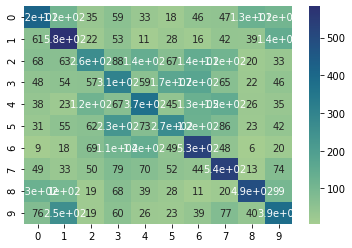

In [31]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='crest')
plt.show()

In [34]:
cnn_model=Sequential([
  Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

In [35]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

In [36]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
cnn_history=cnn_model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=20, batch_size=300,verbose=1)

Epoch 1/20
167/167 [==============================] - 37s 220ms/step - loss: 1.1584 - accuracy: 0.5942 - val_loss: 1.2921 - val_accuracy: 0.5497
Epoch 2/20
167/167 [==============================] - 35s 210ms/step - loss: 1.1333 - accuracy: 0.6049 - val_loss: 1.2762 - val_accuracy: 0.5506
Epoch 3/20
167/167 [==============================] - 35s 211ms/step - loss: 1.0924 - accuracy: 0.6184 - val_loss: 1.2880 - val_accuracy: 0.5590
Epoch 4/20
167/167 [==============================] - 36s 218ms/step - loss: 1.0696 - accuracy: 0.6281 - val_loss: 1.2981 - val_accuracy: 0.5490
Epoch 5/20
167/167 [==============================] - 35s 210ms/step - loss: 1.0350 - accuracy: 0.6393 - val_loss: 1.2574 - val_accuracy: 0.5658
Epoch 6/20
167/167 [==============================] - 36s 213ms/step - loss: 1.0168 - accuracy: 0.6470 - val_loss: 1.2438 - val_accuracy: 0.5698
Epoch 7/20
167/167 [==============================] - 34s 206ms/step - loss: 0.9908 - accuracy: 0.6564 - val_loss: 1.2531 - val_ac

In [41]:
loss1,tr_accuracy=cnn_model.evaluate(x_train,y_train)
print('Train accuracy = ',tr_accuracy)
loss2,te_accuracy=cnn_model.evaluate(x_test,y_test)
print('Test accuracy = ',te_accuracy)

1563/1563 [==============================] - 13s 7ms/step - loss: 0.6702 - accuracy: 0.7689
Train accuracy =  0.7688800096511841
313/313 [==============================] - 2s 6ms/step - loss: 1.4351 - accuracy: 0.5660
Test accuracy =  0.5659999847412109


In [42]:
cnn_y_pred_prob = cnn_model.predict(x_test)
cnn_y_pred = np.argmax(cnn_y_pred_prob, axis=1)
cnn_y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 5s 8ms/step


In [43]:
precision, recall, f1, support = precision_recall_fscore_support(cnn_y_true, cnn_y_pred, average='weighted')

In [44]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Support: {support}')

Precision: 0.5778198450794106
Recall: 0.566
F1 Score: 0.5654228243702344
Support: None


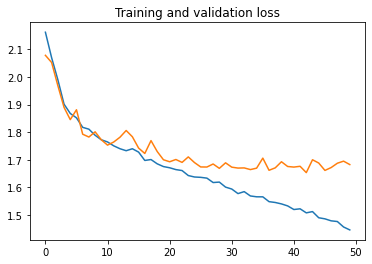

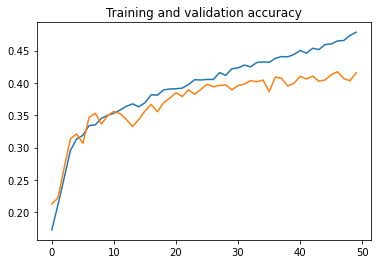

In [45]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.show()
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.show()

In [46]:
cnn_cm=confusion_matrix(cnn_y_true,cnn_y_pred)
print(cnn_cm)

[[599  40  84  26  26  16  17  10 153  29]
 [ 45 701  13  40  12  21  31  11  73  53]
 [ 68  15 554  46  89  89  75  28  29   7]
 [ 37  18  89 415  65 195 101  28  37  15]
 [ 32  10 120  57 570  56  84  44  24   3]
 [ 16  17 125 199  52 452  66  37  24  12]
 [ 13  15  73  78  63  49 687   5  13   4]
 [ 38  13  86  63 103 103  27 546  12   9]
 [100  59  26  29  16  21  15  13 703  18]
 [ 79 198  38  44  16  31  35  36  90 433]]


In [47]:
cnn_report=classification_report(cnn_y_true,cnn_y_pred)
print(cnn_report)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1000
           1       0.65      0.70      0.67      1000
           2       0.46      0.55      0.50      1000
           3       0.42      0.41      0.42      1000
           4       0.56      0.57      0.57      1000
           5       0.44      0.45      0.44      1000
           6       0.60      0.69      0.64      1000
           7       0.72      0.55      0.62      1000
           8       0.61      0.70      0.65      1000
           9       0.74      0.43      0.55      1000

    accuracy                           0.57     10000
   macro avg       0.58      0.57      0.57     10000
weighted avg       0.58      0.57      0.57     10000



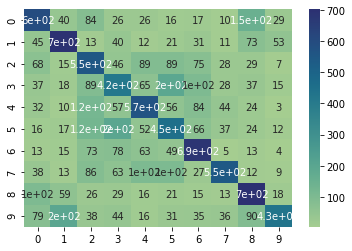

In [48]:
import seaborn as sns
sns.heatmap(cnn_cm,annot=True,cmap='crest')
plt.show()

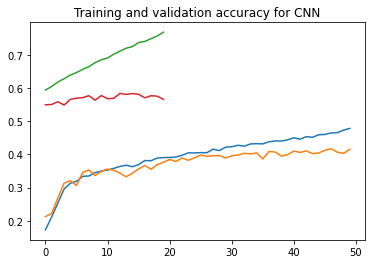

In [49]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy for DNN')

cnn_train_acc=cnn_history.history['accuracy']
cnn_val_acc=cnn_history.history['val_accuracy']

plt.plot(cnn_train_acc)
plt.plot(cnn_val_acc)
plt.title('Training and validation accuracy for CNN')
plt.show()
plt.show()